<h1>Case1 - Heart Disease Classification </h1>

4.2.2018 (last modified)<br>
Tom Thiel<br>
Metropolia UAS<br>

## 1. Objectives

For this assignement we are using <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/">directory</a> containing 4 datasets concerning heart disease diagnosis.

The objective of this assignment is to traing neural network to predict finding of heart disease from clinical data. The datasets have 14 attributes. 13 of these attributes containing data to make the diagnosis. The last attribute is the diagnosis made by a doctor. The goal is to use these 13 values and traing an neural network to predict if person has or doesn't have heart disease. This is a binary classification problem. 

The dataset are first loaded and preprocessed and then the model is trained and evaluated. 

Preprosessing is needed to get the data ready for training. The data is first loaded and then inserted into dataframes using Pandas library. The the missing values need to be replaced and the datasets needs to be scaled using Numpy. The modeling and training is done with sklearn and Keras.io. Evaluating the training results visually is done plotting using matplotlib library.


## 2. Required libraries




We will start off by importing all of the classes and functions we will need.

<b>Numpy:</b> Adds Python support for large, multi-dimensional arrays and matrices.   
<b>Pandas:</b> Offers data structures and operations for manipulating numerical tables and time series.   
<b>Matplotlib:</b> For plotting.   
<b>Scikit-learn:</b> Data modeling tool for regression, classification and clustering problems.  
<b>Keras:</b> Neural Network API for TensorFlow.    
<b>IPython.display</b> To display variables on markdown cells

In [346]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown as md

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import models
from keras import layers

%matplotlib inline

In [256]:
print('numpy', np.__version__)

numpy 1.12.1


## 3. Data description and preprocessing

There are 4 datasets: Cleveland, Hungarian, Swizerland and Longbeach (Vancouver).

Description of the 14 attributes used in this assignement:
   <br>
      -- 1. #3  (age)    
      -- 2. #4  (sex) 0 = female; 1 = male       
      -- 3. #9  (cp) - Chest pain type     
      -- 4. #10 (trestbps) - Resting blood pressure in mmHg   
      -- 5. #12 (chol) - Serum cholesterol in mg/dl   
      -- 6. #16 (fbs) - Fasting blood sugar        
      -- 7. #19 (restecg) - Rest ECG   
      -- 8. #32 (thalach) - Maximum HR   
      -- 9. #38 (exang) - Excrecise induced angina   
      -- 10. #40 (oldpeak) - ECG    
      -- 11. #41 (slope) - Slopetype in ECG ST segment    
      -- 12. #44 (ca) - Angiography     
      -- 13. #51 (thal)      
      -- 14. #58 (num)       (the predicted attribute)

In [257]:
#import datasets
filename_cleve = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
filename_hun = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
filename_ch = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
filename_va = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data'

#column names for the data
colnames = ['age','sex','cp','tresbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

#datasets into dataframes and replace '?' values as NaN
df_cleve = pd.read_csv(filename_cleve, names=colnames, na_values = '?')
df_hun  = pd.read_csv(filename_hun, names=colnames, na_values = '?')
df_ch = pd.read_csv(filename_ch, names=colnames, na_values = '?')
df_va = pd.read_csv(filename_va, names=colnames, na_values = '?')

df_cleve.head()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [258]:
# Descriptive statics
frames = [df_cleve, df_hun, df_ch, df_va]
df = pd.concat(frames)

df.describe()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


There are 920 of samples in total.

Looking at the sample count, slope, angiography and thal values seem to be missing in at least one or two of the datasets. 

The chol value is calculated as serum cholesterol in mg/dl (HDL + LDL + 0,2*Triglycerides  <a href="https://www.healthline.com/health/serum-cholesterol#results">source</a>) thus has so much variation between mean and max values.    

In [259]:
np.sum(np.isnan(df))

age          0
sex          0
cp           0
tresbps     59
chol        30
fbs         90
restecg      2
thalach     55
exang       55
oldpeak     62
slope      309
ca         611
thal       486
num          0
dtype: int64

In [272]:
# Fill missing values with mean 
# df.fillna(df.mean())
df = df.where(~np.isnan(df), df.mean(), axis = 'columns')

In [273]:
#Use diagnosis values 1,2,3,4  as binary label 1 (has heart disease).
labels = (df['num'] > 0).values

In [274]:
#input data. extract the num column as it is the label for the model.
columns = ['age','sex','cp','tresbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

# Make new dataframe without the diagnosis column 
data = df[columns].values
data.shape

(920, 13)

The dataframe has now 13 columns.

In [275]:
# Scale the data
# Min max scaler to find minumum and maximum values and scale them
min_max_scaler = preprocessing.MinMaxScaler()

# new_data = k*data + b (constant)
data_scaled = min_max_scaler.fit_transform(data)

In [276]:
min_max_scaler.scale_, min_max_scaler.min_

(array([ 0.02040816,  1.        ,  0.33333333,  0.005     ,  0.00165837,
         1.        ,  0.5       ,  0.00704225,  1.        ,  0.11363636,
         0.5       ,  0.33333333,  0.25      ]),
 array([-0.57142857,  0.        , -0.33333333,  0.        ,  0.        ,
         0.        ,  0.        , -0.42253521,  0.        ,  0.29545455,
        -0.5       ,  0.        , -0.75      ]))

In [277]:
# Split the data into random training and validation subsets using sklearning.model

# 36% of the training data is randomly used for testing.
x_train, x_test, y_train, y_test = train_test_split(data_scaled, labels, test_size = 0.36)

In [332]:
print('xtrain shape: ', x_train.shape)
print('xtest shape: ', x_test.shape)

xtrain shape:  (588, 13)
xtest shape:  (332, 13)


## 4. Modeling and compilation

Let’s start off by defining baseline model. The training is supervised so the user configurates the network topology and chooses how it is trained. To get started there are some rule of thums selecting the how many hidden layers and neurons your networks should use. At this point you must also define what kind of activation function to use for each layer. Finally we should choose the loss function to be used in training.

<b>How many layers?</b>   
The number of layres shoud be squareroot of m*n. The dimensions of the sampledata is 1x13. sqrt(1+13) = 3 or 4. So we start the model two fully connected hidden layer and one output layer. 


<b>What kind of activation function</b>   
The activation model for these hidden layers is called <b>ReLU</b> which is generally accepted to work best. The output layer uses <b>Sigmoid</b> activation which returns a number between 0 and 1 on a s-shaped curve. As in this assignment our goal is a binary classification.

<b>How many neurons?</b>   
-The same number of neurons as input variables. This is a good default starting point when creating neural networks.   
-The number of hidden neurons should be between the size of the input layer and the size of the output layer.   
-The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.     
-The number of to nodes has to be kept as low as possible   
 
<b>Loss function?</b>   
Logarithmic loss function (binary_crossentropy) is preferred for binary classification problems. 


The objectives of training is varied. This is one of the reasons why the evaluation of deep networks remains an empirical process and everything is developed through experiments. The goal is to find a global minumum, but your training can get stucked in local minumum. That's why it is good practice to always perform several trainings. Some times training can accept some noise on the inputs while a good training can't. 

This datasets contain less than thousand samples of numerical data combined. The training is should only take some seconds if not less. Sometimes the complexity of a neural networks parameters can range in tens or even hundreds of millions so some thought should be put on choosing the model. 


 
 
Sources:   
<a href="https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw">how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural</a>

http://news.mit.edu/2017/explained-neural-networks-deep-learning-0414

https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/




In [320]:
# Define the architecture of the network
model = Sequential()
model.add(Dense(10, activation = 'relu', input_dim =  13))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

#compile the network
model.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

# 5. Training and Validation

Firstly you choose the number of epochs, which is the number of iterations the samples run through the network. Not always more is better. As in some point the network starts to learn the training data too well and becomes overfit. 

We start with 50 epochs.

The samples can be fed as batches. It requires less memory and the results should be better. Since you train network using less number of samples the overall training procedure requires less memory. It's especially important in case if you are not able to fit dataset in memory.

We start with batch size of 40.

After every training iteration we run the test data throught the network and validate how the network predicts to unseen values.

In [321]:
N = 50 # number of epochs
h = model.fit(x_train, y_train,
             verbose = 0, #hide training output
             epochs = N,
             batch_size = 40,
             validation_data = (x_test, y_test))

# 6. Evaluation

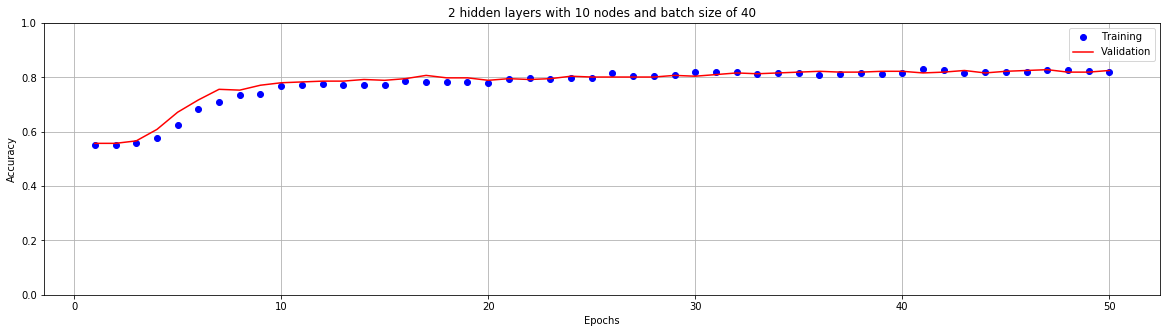

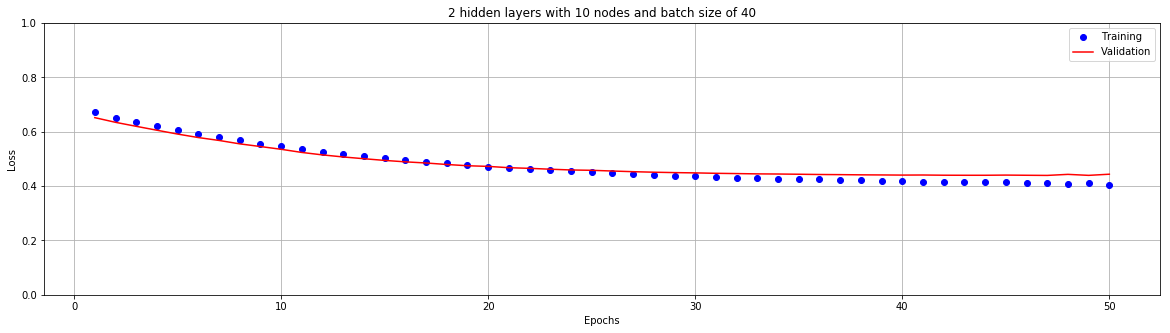

max accuracy:  0.831632651034
max val_acc: 0.828313249421
min loss function value 0.40520648121


In [349]:
# plot the results
epochs = range(1, N + 1)
acc = h.history['acc']
val_acc = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

# accuracy plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, acc, 'bo', label = 'Training')
plt.plot(epochs, val_acc, 'r-', label = 'Validation')
plt.title('2 hidden layers with 10 nodes and batch size of 40')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1]) #limiting values for better comparison between plots
plt.grid()
plt.legend()
plt.show()

# loss plot to see how the lossfunction decreases
plt.figure(figsize = (20, 5))
plt.plot(epochs, loss, 'bo', label = 'Training')
plt.plot(epochs, val_loss, 'r-', label = 'Validation')
plt.title('2 hidden layers with 10 nodes and batch size of 40')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1]) 
plt.grid()
plt.legend()
plt.show()
print('max accuracy: ', max(acc))
print('max val_acc:', max(val_acc))
print('min loss function value', min(loss))

## 7. Results and Discussion 

Model trained with 2 hidden layers with 10 nodes and and one-node output layer.<br>
With 50 epocsh and batch size of 40 results are:<br>
--max accuracy: 83% <br>
--max val accuracy: 83% <br>
--loss function value: 0.41

This means the network can predict if a patient has heart disease with accuracy of 83%. 

By looking the plots above itseems in this model, accuracy-vise, you could stop training after 30-40 runs. Same goes with the loss function value.

The validation accuracy is the accuracy from test data. 

### 7.1 Dropping and upping the batch size

The following results are run on other notebook file with the same dataset.

Lovering the batch size to 10 seems to get the accuracy up bit faster to 84%, and the validation accuracy goes up to 84% as well. But the validation acc seems to have more fluctuation.

<img src="img/10-acc.png">


Upping the batch size to 230. Takes many more iterations to reach best accuracy and it never gets over 80%. Interestingly the validation accuracy seem to stay higher for many iterations. This can happen by random chance. Usually this will go away as you train more.

<img src="img/230-acc.png">

With batch size of 230 the loss function decreases much slower never reaching values below 0.5.

<img src="img/230-loss.png">

### 7.2 Changing the value of nodes
With this dataset lovering and upping the amount of nodes in hidden layers doesn't seem to get the accuracy any better as long as the number of hidden neurons is kept between 1 and 13 (the size of the input layer and the size of the output layer).

### 7.3 Standardization 
Rather than performing the standardization on the entire dataset, it would be good practice to do the standardization on training data and test data separately. This makes standardization a step in model preparation. It prevents the algorithm having knowledge of “unseen” data during evaluation.

## 8. Conclusions

The goal of this assignment was to create neural network model to predict the presence of a heart disease by using 920 samples of clinical patient data with 13 attributes. In the end the trained model could predict patiens heart disease with the accuracy of 83%.

With this dataset smaller batchsizes (sub 100) seemed to work better for accuracy and for lower training time. 